# Logistic Regression: Lead Scoring Case Study

## Problem Statement:
* X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

* Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%.

## Goals and Objectives

* Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
* There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Importing/Reading Data

In [726]:
## Importing Required Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [727]:
## Supressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [728]:
df1=pd.read_csv("Leads.csv")

In [729]:
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Understanding


In [730]:
df1.shape

(9240, 37)

In [731]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [732]:
# 7 coulmns numerical and 30 columns categorical

In [733]:
df1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [734]:
## Outliers  found in" Total visits," Total time spent on Website"
## Redundancy

### Cleaning the Dataset

In [735]:
## Converting all the values to lower case to avoid the categories.

df1 = df1.applymap(lambda s:s.lower() if type(s) == str else s)

In [736]:
## If no option was selected, replacing " Select" with "NaN"

df1=df1.replace('select',np.nan)

In [737]:
## Checking the existence of unique values

df1.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [738]:
## Dropping unique values columns

df2=df1.drop(["Magazine","I agree to pay the amount through cheque","Get updates on DM Content",
              "Update me on Supply Chain Content","Receive More Updates About Our Courses"],axis=1)

In [739]:
## Checking the percentage of missing value

round (100*(df2.isnull().sum()/len(df2.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [740]:
##Columns having null values more than 30%
df3 = df2.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score',
                'Lead Profile','Tags','Lead Quality','How did you hear about X Education','City'],axis=1)
df3.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [741]:
#Rechecking the percentage of missing values
round (100*(df3.isnull().sum()/len(df3.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [742]:
## filling the information that is not available.

df3['What matters most to you in choosing a course']=df3['What matters most to you in choosing a course'].fillna('not provided')
df3['What is your current occupation']=df3['What is your current occupation'].fillna('not provided')

df3['Specialization']=df3['Specialization'].fillna('not provided')
df3['Country']=df3['Country'].fillna('not provided')

df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [743]:
## Rechecking the percentage of missing values
round (100*df3.isnull().sum()/len(df3.index)*2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      1.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      3.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             3.0
Last Activity                                    2.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [744]:
## Checking the frequency of each country after applicable changes:

df3["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
france                     6
oman                       6
unknown                    5
kuwait                     4
germany                    4
south africa               4
canada                     4
nigeria                    4
sweden                     3
ghana                      2
asia/pacific region        2
netherlands                2
philippines                2
italy                      2
uganda                     2
china                      2
belgium                    2
bangladesh                 2
malaysia                   1
vietnam                    1
sri lanka                  1
tanzania                   1
denmark                    1
russia        

In [745]:
## As India is having the highest frequency, lets take a look at the count as per in India, Outside India, not provided.
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df3['Country'] = df3.apply(lambda x:slots(x['Country']), axis = 1)
df3['Country'].value_counts()       

outside india    6779
not provided     2461
Name: Country, dtype: int64

In [746]:
## If the null values are removed, the percentage of overall values we gonna loose:

round(100*(sum(df3.isnull().sum(axis=1) > 1)/df2.shape[0]),2)

1.48

In [747]:
df4 = df3[df3.isnull().sum(axis=1) <1]
df4.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [748]:
## After cleaning Percentage of missing values

round(100*(df4.isnull().sum()/len(df4.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [749]:
# Removing Id section as these are unique for each person and would not add any meaningful info during alaysis

df_final_1 = df4.drop(['Prospect ID', 'Lead Number'],1)
df_final_1.shape


(9074, 21)

Now there is no missing value in the data-set, we can proceed towards the exploratory data analysis.

### EDA 

#### Univariate Analysis: Categorical

In [750]:
df_final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [751]:
## checking for the numeric data types:
df_num = df_final_1._get_numeric_data().columns
df_num

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [752]:
## checking for the objetc data types:
df_num = df_final_1.dtypes[df_final_1.dtypes == 'object']
df_num 


Lead Origin                                      object
Lead Source                                      object
Do Not Email                                     object
Do Not Call                                      object
Last Activity                                    object
Country                                          object
Specialization                                   object
What is your current occupation                  object
What matters most to you in choosing a course    object
Search                                           object
Newspaper Article                                object
X Education Forums                               object
Newspaper                                        object
Digital Advertisement                            object
Through Recommendations                          object
A free copy of Mastering The Interview           object
Last Notable Activity                            object
dtype: object

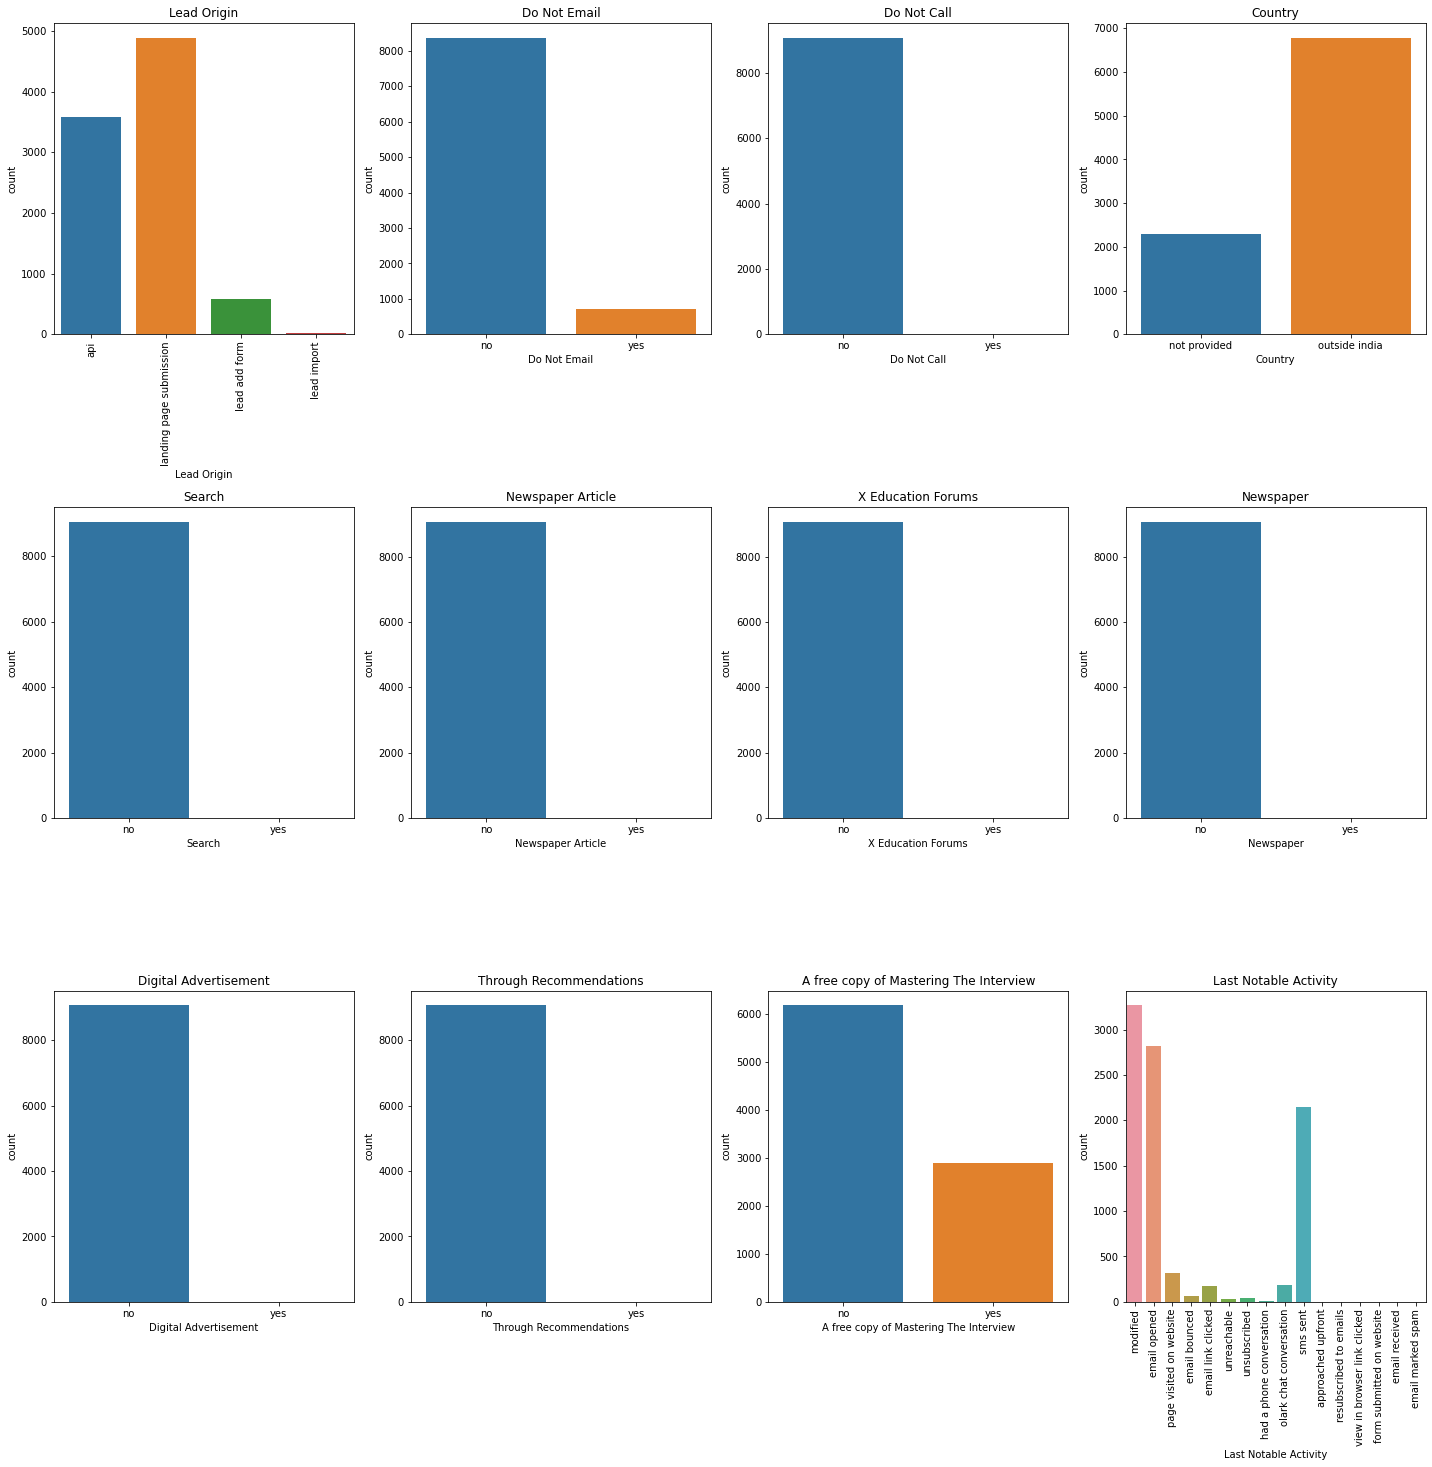

In [753]:
## plotting the graph for univariate analysis of categorical data

plt.figure(figsize = (20,25))

plt.subplot(4,4,1)
sns.countplot(df_final_1['Lead Origin']).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(4,4,2)
sns.countplot(df_final_1['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(4,4,3)
sns.countplot(df_final_1['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(4,4,4)
sns.countplot(df_final_1['Country'])
plt.title('Country')

plt.subplot(4,4,5)
sns.countplot(df_final_1['Search'])
plt.title('Search')

plt.subplot(4,4,6)
sns.countplot(df_final_1['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(4,4,7)
sns.countplot(df_final_1['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(4,4,8)
sns.countplot(df_final_1['Newspaper'])
plt.title('Newspaper')

plt.subplot(4,4,9)
sns.countplot(df_final_1['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(4,4,10)
sns.countplot(df_final_1['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(4,4,11)
sns.countplot(df_final_1['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(4,4,12)
sns.countplot(df_final_1['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.tight_layout()
plt.show()

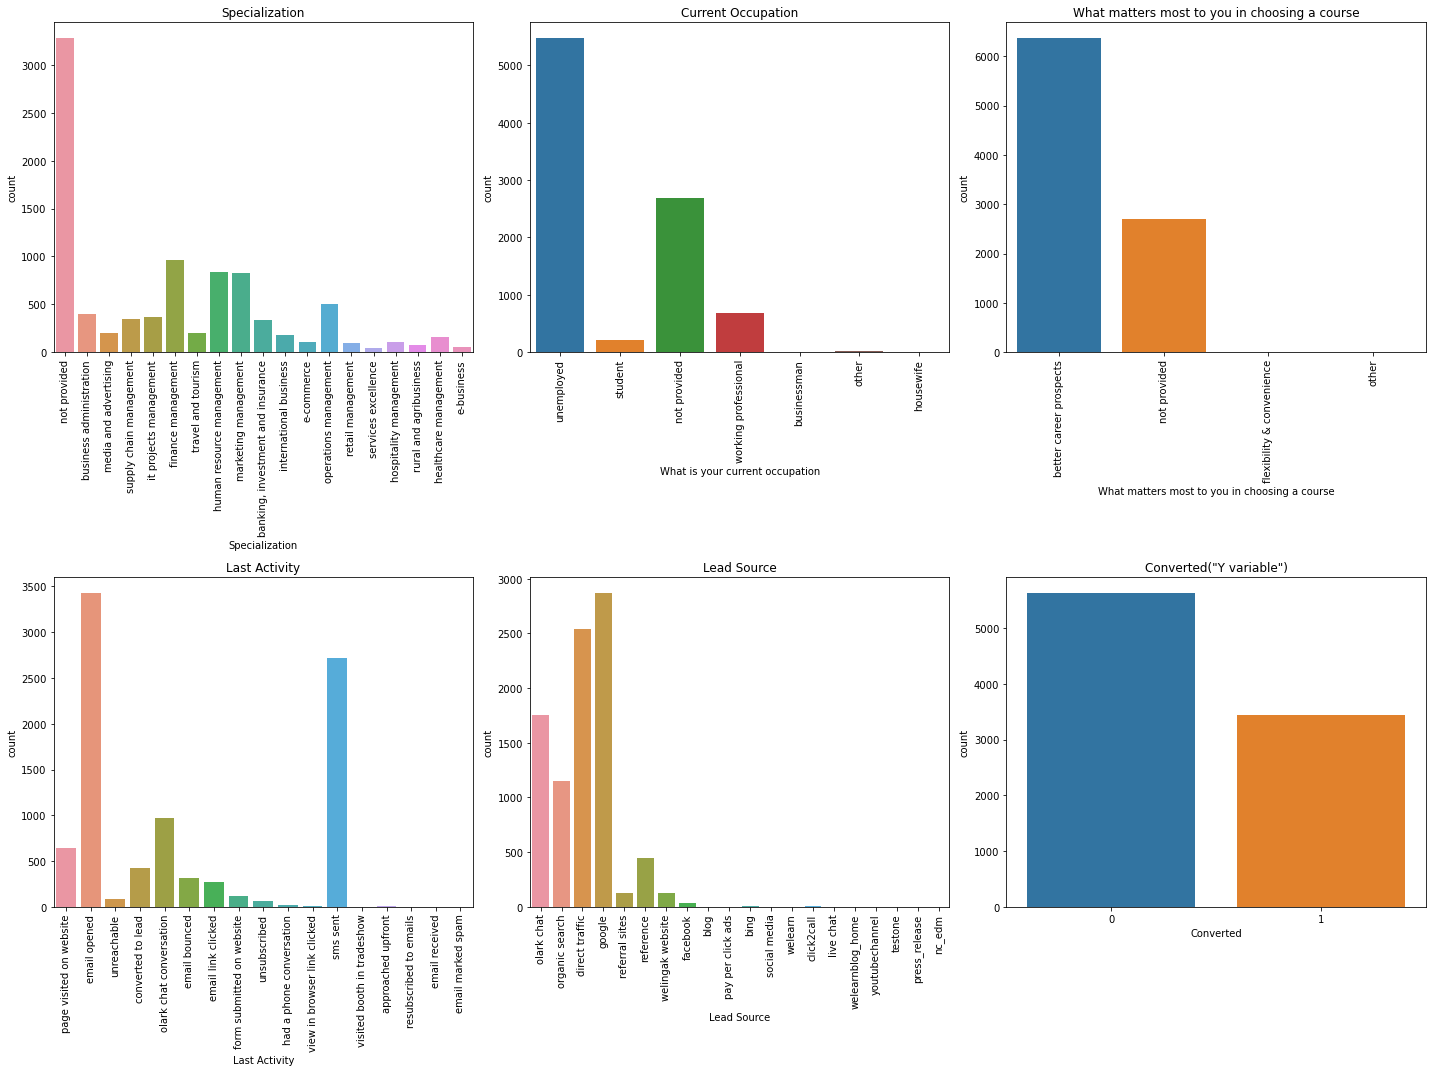

In [754]:
plt.figure(figsize = (20,15))

plt.subplot(2,3,1)
sns.countplot(df_final_1['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,3,2)
sns.countplot(df_final_1['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,3,3)
sns.countplot(df_final_1['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,3,4)
sns.countplot(df_final_1['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.subplot(2,3,5)
sns.countplot(df_final_1['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.subplot(2,3,6)
sns.countplot(df_final_1['Converted'])
plt.title('Converted("Y variable")')


plt.tight_layout()
plt.show()

#### Univariate Analysis: Numeric

In [755]:
## checking for the numeric data types:
df_num = df_final_1._get_numeric_data().columns
df_num

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

We will make the plots on the basis of the numeric list but will drop the Converted from the list

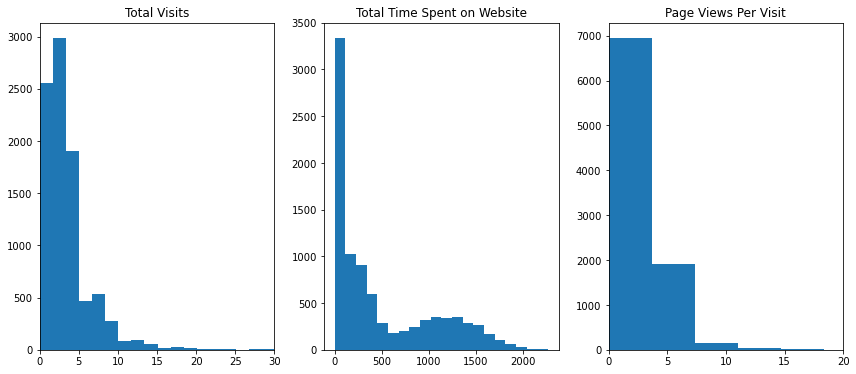

In [756]:
plt.figure(figsize = (12,10))

plt.subplot(2,3,1)
plt.hist(df_final_1['TotalVisits'], bins = 150)
plt.title('Total Visits')
plt.xlim(0,30)

plt.subplot(2,3,2)
plt.hist(df_final_1['Total Time Spent on Website'], bins = 20)
plt.title('Total Time Spent on Website')

plt.subplot(2,3,3)
plt.hist(df_final_1['Page Views Per Visit'], bins = 15)
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.tight_layout()
plt.show()


#### Relating the successful leads to the other variables

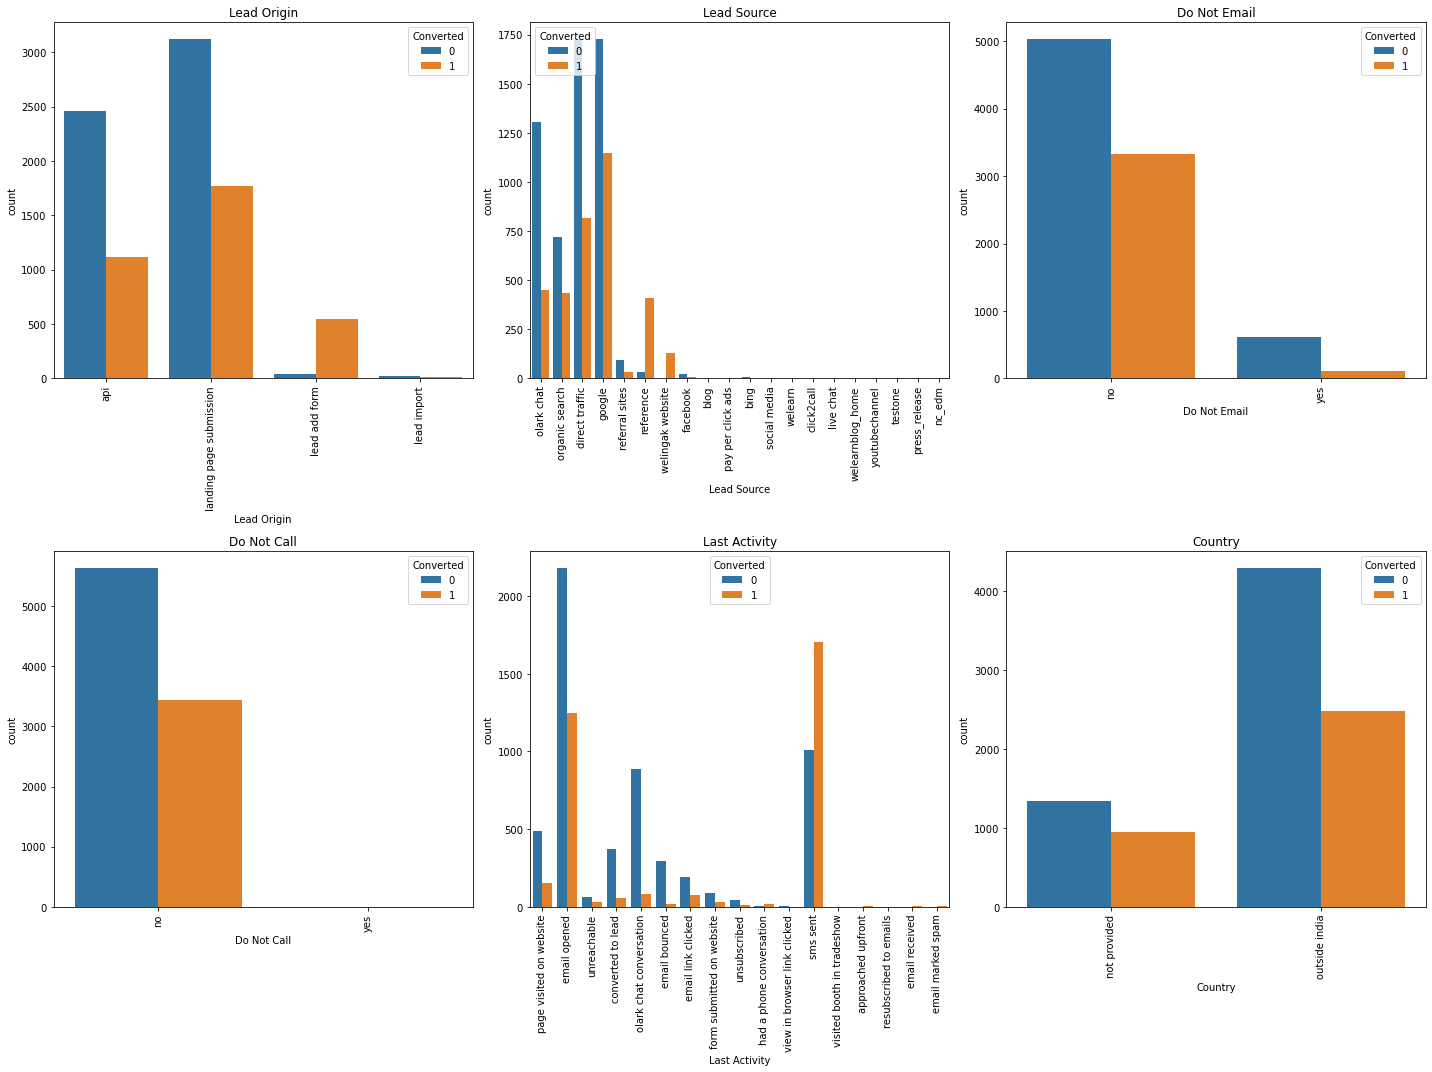

In [757]:
plt.figure(figsize = (20,15))

plt.subplot(2,3,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_final_1).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(2,3,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_final_1).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(2,3,3)
sns.countplot(x='Do Not Email', hue='Converted', data= df_final_1).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(2,3,4)
sns.countplot(x='Do Not Call', hue='Converted', data= df_final_1).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')

plt.subplot(2,3,5)
sns.countplot(x='Last Activity', hue='Converted', data= df_final_1).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(2,3,6)
sns.countplot(x='Country', hue='Converted', data= df_final_1).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.tight_layout()
plt.show()

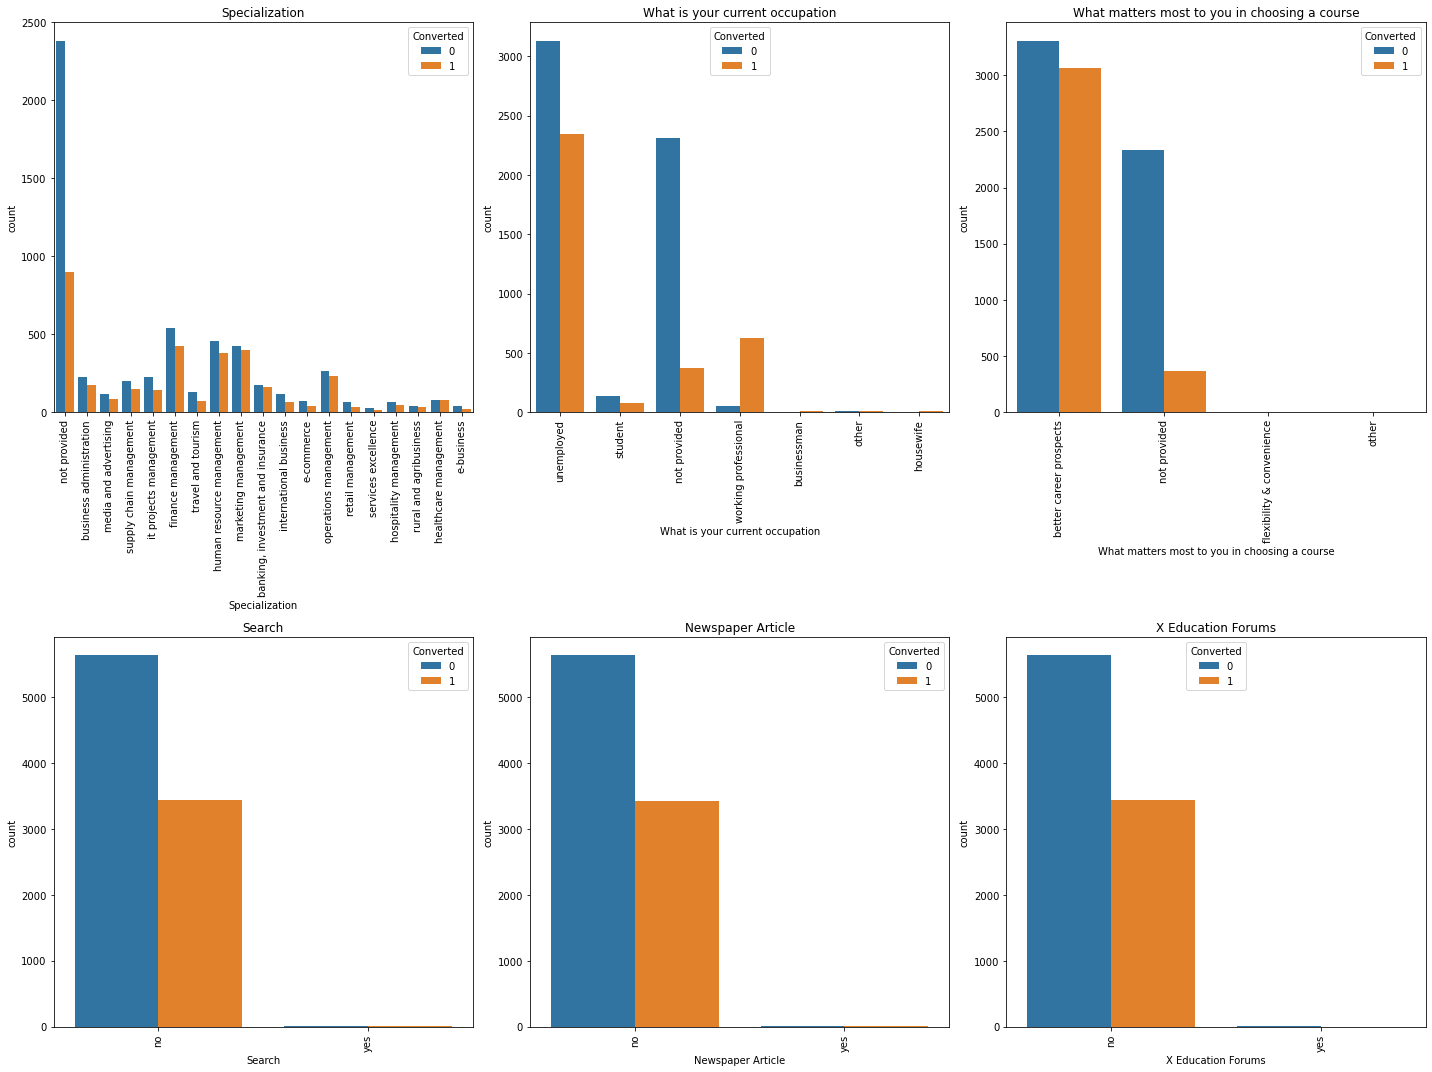

In [758]:
plt.figure(figsize = (20,15))

plt.subplot(2,3,1)
sns.countplot(x='Specialization', hue='Converted', data= df_final_1).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(2,3,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_final_1).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.subplot(2,3,3)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_final_1).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(2,3,4)
sns.countplot(x='Search', hue='Converted', data= df_final_1).tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.subplot(2,3,5)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_final_1).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(2,3,6)
sns.countplot(x='X Education Forums', hue='Converted', data= df_final_1).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.tight_layout()
plt.show()

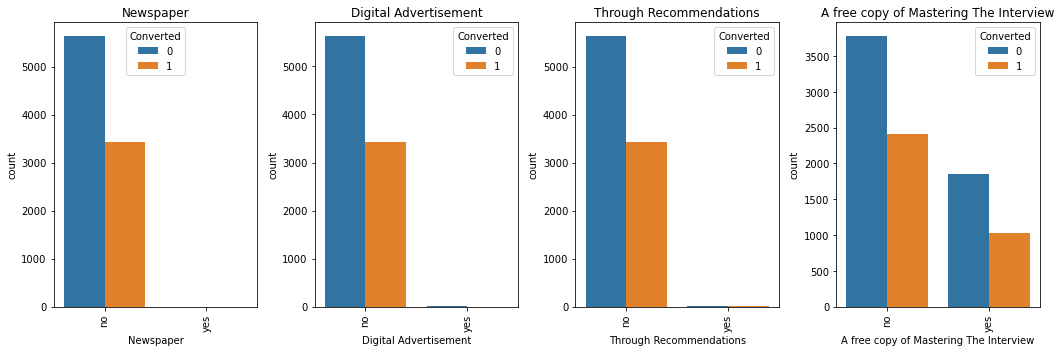

In [759]:
plt.figure(figsize = (15,5))

plt.subplot(1,4,1)
sns.countplot(x='Newspaper', hue='Converted', data= df_final_1).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,4,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_final_1).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.subplot(1,4,3)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_final_1).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,4,4)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_final_1).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')


plt.tight_layout()
plt.show()

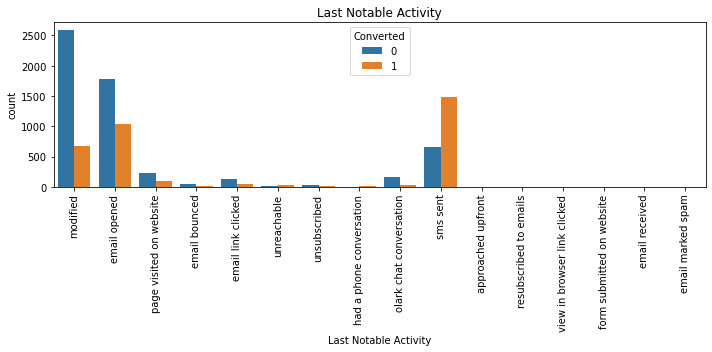

In [760]:
plt.figure(figsize = (10,5))

sns.countplot(x='Last Notable Activity', hue='Converted', data= df_final_1).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.tight_layout()
plt.show()

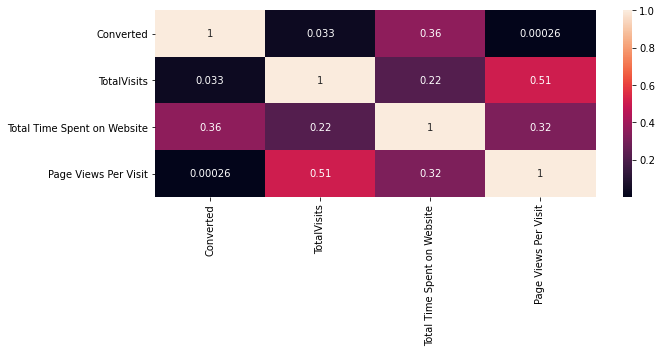

In [761]:
# To check the correlation among varibles:

plt.figure(figsize=(10,5))
sns.heatmap(df_final_1.corr(), annot = True)
plt.tight_layout()
plt.show()

The above correlation graph shows that the relation between the variables is very low.

In [762]:
## Defining the numeriv variables on the basis of percentile.

numeric_1 = df_final_1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric_1.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


### Creating Dummy variables

In [763]:
## Listing all the categorical variables in the data-set.

df_cat =list(df_final_1.loc[:, df_final_1.dtypes == 'object'].columns)
df_cat

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [764]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_final_1[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
df_final_dum_1= pd.concat([df_final_1, dummy], axis=1)
df_final_dum_1

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,outside india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,outside india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,outside india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,outside india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,outside india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,outside india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,outside india,...,0,0,0,0,0,0,1,0,0,0


In [765]:
df_final_dum_1 = df_final_dum_1.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_final_dum_1

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Test-Train Split

In [766]:
## Importing the train_test_split from sklearn:

from sklearn.model_selection import train_test_split

In [767]:
## Dropping the "Converted" to create the dataframe for test and training data:

X = df_final_dum_1.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [768]:
## Putting the target variable in y :

y = df_final_dum_1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [769]:
## Splitting the dataset into 70% and 30% for train and testset of data respectively:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

#### Scalling the Numeric variables using the MinMax Scalling.

In [770]:
## Imporing the MinMaxScaler from sklearn 

from sklearn.preprocessing import MinMaxScaler

In [771]:
## Scaling the numeric features for better correlation of the data:

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Model Building

In [772]:
## Importing  'LogisticRegression' from sklearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#### RFE:Recursive Feature Elimination

In [773]:
## As a large number of feature are present in the dataset so we will be using teh RFE to get the most desired ones.
## Importing  RFE from sklearn
from sklearn.feature_selection import RFE

# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [774]:
# Creating the list of 15 features able to define the model by using RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', False, 26),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 40),
 ('Specialization_business administration', False, 33),
 ('Specialization_e-business', False, 32),
 ('Specialization_e-commerce', False, 23),
 ('Specialization_finance management', False, 30),
 ('Specialization_healthcare management', False, 25),
 ('Specialization_hospitality management', False, 45),
 ('Specialization_human resource management', False, 31),
 ('Specialization_international business', False, 37),
 ('Specialization_it projects management', False, 28),
 ('Specialization_marketing management', False, 22),
 ('Specialization_media and advertising', False, 42),
 ('Specialization_operations management', False, 27),
 ('Specialization_retail management', False, 63),
 ('Specialization_rural and agribusiness', False, 24),
 ('Specialization_serv

In [775]:
## Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

## Selecting columns selected by RFE
X_train = X_train[col]

In [776]:
## Checking the correlation between the independent variables:
X_train.corr()

,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_had a phone conversation,Last Notable Activity_unreachable
TotalVisits,1.000000,0.286440,-0.209241,-0.384267,-0.100453,0.032498,-0.169616,-0.003117,-0.002862,0.043026,-0.022982,0.050564,0.010559,0.030698,0.007556
Total Time Spent on Website,0.286440,1.000000,-0.194757,-0.376744,-0.093312,-0.058903,-0.193360,0.136100,0.007082,0.036629,-0.012661,0.086408,0.094609,0.027022,0.013139
Lead Origin_lead add form,-0.209241,-0.194757,1.000000,-0.125965,0.456391,-0.025401,-0.083083,0.141932,0.015471,-0.010432,0.014957,0.052586,0.188972,-0.009330,0.018352
Lead Source_olark chat,-0.384267,-0.376744,-0.125965,1.000000,-0.058966,-0.054055,0.415440,-0.116580,-0.013805,-0.019531,0.016839,-0.146834,-0.089672,-0.006257,-0.007551
Lead Source_welingak website,-0.100453,-0.093312,0.456391,-0.058966,1.000000,0.000352,-0.036427,0.080403,-0.003365,-0.004761,-0.009596,0.093203,-0.033464,-0.004258,-0.006906
Do Not Email_yes,0.032498,-0.058903,-0.025401,-0.054055,0.000352,1.000000,-0.051791,-0.025886,-0.008107,-0.011470,0.014461,-0.024370,-0.048679,-0.010257,-0.016636
Last Activity_olark chat conversation,-0.169616,-0.193360,-0.083083,0.415440,-0.036427,-0.051791,1.000000,-0.224315,-0.009551,-0.000490,0.026601,-0.136295,-0.081012,-0.012084,-0.019598
Last Activity_sms sent,-0.003117,0.136100,0.141932,-0.116580,0.080403,-0.025886,-0.224315,1.000000,-0.018505,-0.017538,-0.046788,0.085691,0.121672,-0.023412,-0.037971
What is your current occupation_housewife,-0.002862,0.007082,0.015471,-0.013805,-0.003365,-0.008107,-0.009551,-0.018505,1.000000,-0.001115,-0.004321,-0.035080,-0.007834,-0.000997,-0.001617
What is your current occupation_other,0.043026,0.036629,-0.010432,-0.019531,-0.004761,-0.011470,-0.000490,-0.017538,-0.001115,1.000000,-0.006113,-0.049631,-0.011084,-0.001410,-0.002287


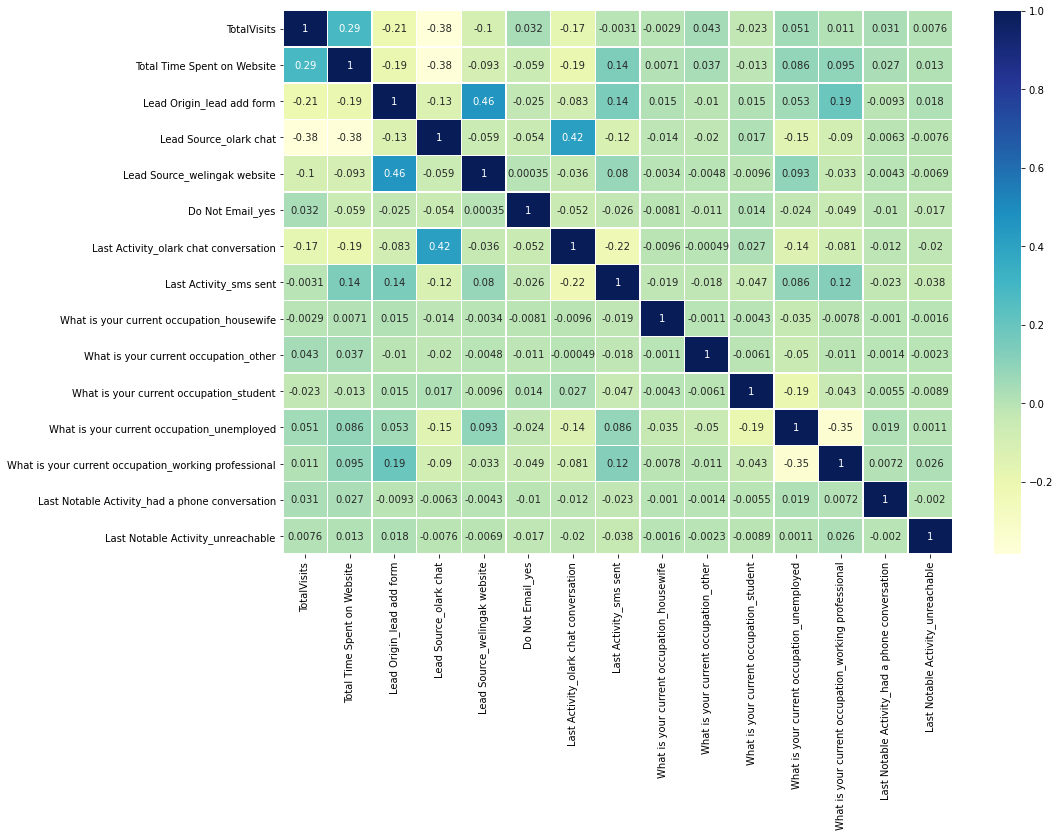

In [777]:
## Visualizing the correlation between the independent variable using heatmap:

plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(), annot=True,linewidths=.5,cmap="YlGnBu")
plt.show()

From  the plot we can easily conclude that the correlation between independent variables is very low.

In [778]:
# Importing statsmodels for model building
import statsmodels.api as sm

# Fitting the data to the model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.0
Date:                Mon, 08 Feb 2021   Deviance:                       5270.1
Time:                        21:04:56   Pearson chi2:                 6.48e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4876      0.114    -30.661      0.000      -3.711      -3.265
TotalVisits                                              5.4367      1.437      3.782      0.000       2.619       8.254
Total Time Spent on Website                              4.6247      0.167     27.689      0.000       4.297       4.952
Lead Origin_lead add form                                3.7433      0.225     16.616      0.000       3.302       4.185
Lead Source_olark chat                                   1.5954      0.112     14.288      0.000       1.377       1.814
Lead Source_welingak website                             2.5982      1.033      2.515      0.012       0.574       4.623
Do Not Email_yes                                        -1.4275      0.170     -8.376      0.000      -1.762      -1.093
Last Activity_olark chat conversation                   -1.3875      0.168     -8.281      0.000      -1.716      -1.059
Last Activity_sms sent                                   1.2834      0.074     17.331      0.000       1.138       1.428
What is your current occupation_housewife               25.4080   3.09e+04      0.001      0.999   -6.05e+04    6.06e+04
What is your current occupation_other                    2.1868      0.755      2.895      0.004       0.706       3.667
What is your current occupation_student                  1.2705      0.227      5.604      0.000       0.826       1.715
What is your current occupation_unemployed               1.1800      0.086     13.680      0.000       1.011       1.349
What is your current occupation_working professional     3.7057      0.205     18.098      0.000       3.304       4.107
Last Notable Activity_had a phone conversation          24.0110   2.17e+04      0.001      0.999   -4.25e+04    4.26e+04
Last Notable Activity_unreachable                        1.8344      0.601      3.051      0.002       0.656       3.013
========================================================================================================================
"""

In [779]:
# Importing 'variance_inflation_factor' to diagnosing collinearity/multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make a VIF dataframe for all the desired variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.07
0,TotalVisits,1.85
2,Lead Origin_lead add form,1.59
7,Last Activity_sms sent,1.54
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
12,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
5,Do Not Email_yes,1.06


__The P-value for the "Last Notable Activity_had a phone conversation" is very high(i.e. 0.999) so we will drop it.__

In [780]:
# dropping "Last Notable Activity_had a phone conversation"
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

Re-fitting the data to the model after Feature elemination.

In [781]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.8
Date:                Mon, 08 Feb 2021   Deviance:                       5285.6
Time:                        21:04:57   Pearson chi2:                 6.48e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4831      0.114    -30.629      0.000      -3.706      -3.260
TotalVisits                                              5.6046      1.450      3.866      0.000       2.763       8.446
Total Time Spent on Website                              4.6104      0.167     27.675      0.000       4.284       4.937
Lead Origin_lead add form                                3.7375      0.225     16.591      0.000       3.296       4.179
Lead Source_olark chat                                   1.5910      0.112     14.249      0.000       1.372       1.810
Lead Source_welingak website                             2.5984      1.033      2.516      0.012       0.574       4.623
Do Not Email_yes                                        -1.4324      0.170     -8.409      0.000      -1.766      -1.099
Last Activity_olark chat conversation                   -1.3919      0.168     -8.310      0.000      -1.720      -1.064
Last Activity_sms sent                                   1.2754      0.074     17.245      0.000       1.130       1.420
What is your current occupation_housewife               23.4021   1.14e+04      0.002      0.998   -2.23e+04    2.23e+04
What is your current occupation_other                    2.1799      0.755      2.887      0.004       0.700       3.660
What is your current occupation_student                  1.2690      0.227      5.600      0.000       0.825       1.713
What is your current occupation_unemployed               1.1852      0.086     13.753      0.000       1.016       1.354
What is your current occupation_working professional     3.7035      0.205     18.099      0.000       3.302       4.105
Last Notable Activity_unreachable                        1.8251      0.601      3.036      0.002       0.647       3.003
========================================================================================================================
"""

In [782]:
# Making VIF dataframe for all the variables in the dataframe

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.reset_index(drop=True,inplace=True)
vif

,Features,VIF
0,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.06
2,TotalVisits,1.85
3,Lead Origin_lead add form,1.59
4,Last Activity_sms sent,1.54
5,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
7,What is your current occupation_working profes...,1.32
8,Lead Source_welingak website,1.31
9,Do Not Email_yes,1.06


__The P-value for the "What is your current occupation_housewife" is very high(i.e. 0.998) so we will drop it.__

In [783]:
# Dropping "What is your current occupation_housewife"
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

Re-fitting the data to the model after Feature elemination.

In [784]:
# Refitting the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.3
Date:                Mon, 08 Feb 2021   Deviance:                       5302.6
Time:                        21:04:57   Pearson chi2:                 6.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4533      0.113    -30.579      0.000      -3.675      -3.232
TotalVisits                                              5.5427      1.444      3.838      0.000       2.712       8.373
Total Time Spent on Website                              4.6048      0.166     27.690      0.000       4.279       4.931
Lead Origin_lead add form                                3.7501      0.225     16.651      0.000       3.309       4.192
Lead Source_olark chat                                   1.5802      0.111     14.187      0.000       1.362       1.798
Lead Source_welingak website                             2.5821      1.033      2.500      0.012       0.558       4.607
Do Not Email_yes                                        -1.4360      0.170     -8.437      0.000      -1.770      -1.102
Last Activity_olark chat conversation                   -1.3974      0.167     -8.348      0.000      -1.725      -1.069
Last Activity_sms sent                                   1.2672      0.074     17.164      0.000       1.123       1.412
What is your current occupation_other                    2.1567      0.755      2.857      0.004       0.677       3.636
What is your current occupation_student                  1.2456      0.226      5.502      0.000       0.802       1.689
What is your current occupation_unemployed               1.1632      0.086     13.582      0.000       0.995       1.331
What is your current occupation_working professional     3.6797      0.204     18.008      0.000       3.279       4.080
Last Notable Activity_unreachable                        1.8153      0.601      3.022      0.003       0.638       2.993
========================================================================================================================
"""

In [785]:
# Making VIF dataframe for all the variables in the dataframe

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.reset_index(drop=True,inplace=True)
vif

,Features,VIF
0,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.06
2,TotalVisits,1.85
3,Lead Origin_lead add form,1.58
4,Last Activity_sms sent,1.53
5,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
7,What is your current occupation_working profes...,1.32
8,Lead Source_welingak website,1.31
9,Do Not Email_yes,1.06


That's the desired list of features for predicting the data.

In [786]:
# Predicting the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:20]

1289    0.647883
3604    0.133180
5584    0.232946
7679    0.133180
7563    0.495090
7978    0.777765
7780    0.167311
7863    0.982741
838     0.772980
708     0.149249
2266    0.976280
4878    0.896746
1560    0.569415
5574    0.108386
3469    0.243967
4117    0.036598
2849    0.009113
5212    0.866099
1071    0.329604
6409    0.160275
dtype: float64

In [787]:
# Reshaping to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:20]

array([0.64788325, 0.13318019, 0.23294642, 0.13318019, 0.49508996,
       0.77776483, 0.16731088, 0.98274125, 0.77298038, 0.1492489 ,
       0.97627977, 0.89674639, 0.56941465, 0.10838576, 0.24396682,
       0.03659762, 0.00911272, 0.86609943, 0.32960395, 0.16027532])

In [788]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final

,Converted,Conversion_Prob
0,1,0.647883
1,0,0.133180
2,0,0.232946
3,0,0.133180
4,0,0.495090
...,...,...
6346,0,0.177917
6347,0,0.044731
6348,0,0.103416
6349,0,0.036598


In [789]:
# Substituting 0 or 1 with the cut off as 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final

,Converted,Conversion_Prob,Predicted
0,1,0.647883,1
1,0,0.133180,0
2,0,0.232946,0
3,0,0.133180,0
4,0,0.495090,0
...,...,...,...
6346,0,0.177917,0
6347,0,0.044731,0
6348,0,0.103416,0
6349,0,0.036598,0


### Model Evaluation

In [790]:
#Importing metrics from sklearn for evaluation
from sklearn import metrics

# Creating confusion matrix to evaluate the results.
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3437,  458],
       [ 747, 1709]], dtype=int64)

In [791]:
# Check the overall accuracy of the model

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.810266099826799

In [792]:
# From the confusion metrix

# Value of true positive
TP = confusion[1,1]
# Value of true negatives
TN = confusion[0,0]
# Value of false positives
FP = confusion[0,1] 
# Value of false negatives
FN = confusion[1,0]

In [793]:
# Calculating the sensitivity
sensitivity = TP/(TP+FN)
sensitivity

0.6958469055374593

In [794]:
# Calculating the specificity
specificity = TN/(TN+FP)
specificity

0.8824133504492939

### ROC curve (receiver operating characteristic curve)
* To show the performance of a classification model at all classification thresholds.

In [795]:
# To select the threshold/cut-off which yields better performance

# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

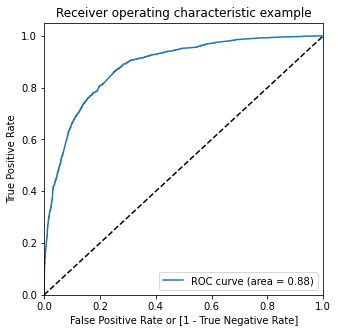

In [796]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

# using the ROC function for graphical presentation
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [797]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.647883,1,1,1,1,1,1,1,1,0,0,0
1,0,0.133180,0,1,1,0,0,0,0,0,0,0,0
2,0,0.232946,0,1,1,1,0,0,0,0,0,0,0
3,0,0.133180,0,1,1,0,0,0,0,0,0,0,0
4,0,0.495090,0,1,1,1,1,1,0,0,0,0,0


In [798]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

In [799]:
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.577232,0.983306,0.321181
0.2,0.2,0.758306,0.912866,0.660847
0.3,0.3,0.788852,0.872557,0.736072
0.4,0.4,0.809321,0.765879,0.836714
0.5,0.5,0.810266,0.695847,0.882413
0.6,0.6,0.802708,0.627850,0.912965
0.7,0.7,0.773579,0.504072,0.943517
0.8,0.8,0.753582,0.413681,0.967908
0.9,0.9,0.706660,0.260179,0.988190


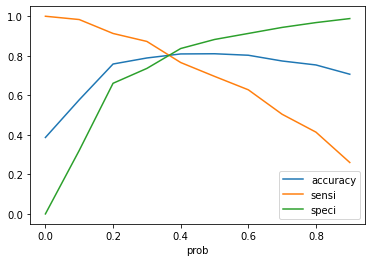

In [800]:
# Plotting the line graph for "accuracy","sensitivity","specificity" go get the optimal cut-off.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [801]:
# Predicting the behaviour of the model on the basis of the cutoff i.e. 0.35
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head(10)

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.647883,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.232946,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495090,0,1,1,1,1,1,0,0,0,0,0,1
5,1,0.777765,1,1,1,1,1,1,1,1,1,0,0,1
6,1,0.167311,0,1,1,0,0,0,0,0,0,0,0,0
7,1,0.982741,1,1,1,1,1,1,1,1,1,1,1,1
8,1,0.772980,1,1,1,1,1,1,1,1,1,0,0,1
9,0,0.149249,0,1,1,0,0,0,0,0,0,0,0,0


In [802]:
# Check the overall accuracy of the model
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8031806014800819

In [803]:
# Creating confusion matrix for the given set of data i.e actual and predicted 
confusion_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_1

array([[3127,  768],
       [ 482, 1974]], dtype=int64)

In [804]:
## From the confusion metrix

# Substituting the value of true positive
TP = confusion_1[1,1]
# Substituting the value of true negatives
TN = confusion_1[0,0]
# Substituting the value of false positives
FP = confusion_1[0,1] 
# Substituting the value of false negatives
FN = confusion_1[1,0]

In [805]:
# Calculating the sensitivity
sensitivity = TP/(TP+FN)
sensitivity

0.8037459283387622

In [806]:
# Calculating the specificity
specificity = TN/(TN+FP)
specificity

0.8028241335044929

#### Analysing the test-set on the final model

In [807]:
# Scaling numeric values for efficient caliberation of values.
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [808]:
# Substituting all the columns in the final train model
col = X_train.columns

# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head(10)

,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_unreachable
8308,1.0,0.035461,0.416813,0,0,0,0,0,0,0,0,1,0,0
7212,1.0,0.028369,0.001320,0,0,0,0,0,1,0,0,0,1,0
2085,1.0,0.000000,0.000000,1,0,1,0,0,0,0,0,1,0,0
4048,1.0,0.028369,0.617077,0,0,0,0,0,1,0,0,1,0,0
4790,1.0,0.028369,0.005282,0,0,0,0,0,0,0,0,1,0,0
8552,1.0,0.063830,0.552817,0,0,0,0,0,1,0,0,0,0,0
2232,1.0,0.021277,0.496919,0,0,0,1,0,0,0,0,1,0,0
5259,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0
2399,1.0,0.028369,0.639085,0,0,0,1,0,1,0,0,1,0,0
8018,1.0,0.000000,0.000000,0,1,0,0,1,0,0,0,0,0,0


In [809]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [810]:
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head(10)

,Converted,Conversion_Prob
0,0,0.456551
1,1,0.839834
2,1,0.982741
3,1,0.878240
4,0,0.108266
5,1,0.671143
6,0,0.210814
7,1,0.329604
8,1,0.655017
9,0,0.036598


In [811]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head(10)

,Converted,Conversion_Prob,final_predicted
0,0,0.456551,1
1,1,0.839834,1
2,1,0.982741,1
3,1,0.878240,1
4,0,0.108266,0
5,1,0.671143,1
6,0,0.210814,0
7,1,0.329604,0
8,1,0.655017,1
9,0,0.036598,0


In [812]:
# Checking the overall accuracy of the  model on the test-data
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8079324274697025

In [813]:
# Creating confusion matrix  for the given-set
confusion_2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion_2

array([[1404,  340],
       [ 183,  796]], dtype=int64)

In [814]:
# Value of true positive
TP = confusion_2[1,1]
# Value of true negatives
TN = confusion_2[0,0]
# Value of false positives
FP = confusion_2[0,1] 
# Value of false negatives
FN = confusion_2[1,0]

In [815]:
# Calculating the sensitivity
sensitivity = TP/(TP+FN)
sensitivity

0.8130745658835546

In [816]:
# Calculating the specificity
specificity = TN/(TN+FP)
specificity

0.805045871559633

#### Precision-Recall from the test-set confusion matrix

In [817]:
confusion_3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion_3

array([[3437,  458],
       [ 747, 1709]], dtype=int64)

In [818]:
# Precision = TP / TP + FP
confusion_3[1,1]/(confusion_3[0,1]+confusion_3[1,1])

0.7886479003230272

In [819]:
#Recall = TP / TP + FN
confusion_3[1,1]/(confusion_3[1,0]+confusion_3[1,1])

0.6958469055374593

#### Precision and recall tradeoff

In [820]:
# importing precision_recall_curve from sklearn
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [821]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

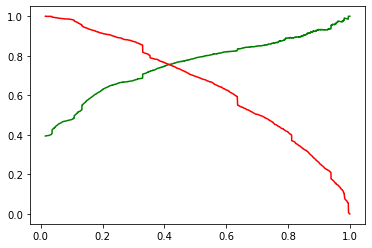

In [822]:
# Plotting the graph 
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [823]:
# presenting the data on the basis of the actually converted and predected
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head(10)

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.647883,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.232946,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495090,0,1,1,1,1,1,0,0,0,0,0,1
5,1,0.777765,1,1,1,1,1,1,1,1,1,0,0,1
6,1,0.167311,0,1,1,0,0,0,0,0,0,0,0,0
7,1,0.982741,1,1,1,1,1,1,1,1,1,1,1,1
8,1,0.772980,1,1,1,1,1,1,1,1,1,0,0,1
9,0,0.149249,0,1,1,0,0,0,0,0,0,0,0,0


In [824]:
# Accuracy of the model
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted) 

0.8110533774208786

In [825]:
# Creating confusion matrix again
confusion_4 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_4

array([[3287,  608],
       [ 592, 1864]], dtype=int64)

In [826]:
# Value of true positive
TP = confusion_4[1,1]
# Value of true negatives
TN = confusion_4[0,0]
# Value of false positives
FP = confusion_4[0,1] 
# Value of false negatives
FN = confusion_4[1,0]

In [827]:
# Precision = TP / TP + FP
precision = TP / (TP + FP)
precision

0.7540453074433657

In [828]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.758957654723127

### Prediction on Test set

In [829]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head(10)

,Converted,Conversion_Prob
0,0,0.456551
1,1,0.839834
2,1,0.982741
3,1,0.878240
4,0,0.108266
5,1,0.671143
6,0,0.210814
7,1,0.329604
8,1,0.655017
9,0,0.036598


In [830]:
# Making prediction using cut off 0.45
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.456551,1
1,1,0.839834,1
2,1,0.982741,1
3,1,0.878240,1
4,0,0.108266,0
...,...,...,...
2718,1,0.108386,0
2719,0,0.364110,0
2720,0,0.133180,0
2721,1,0.820744,1


In [831]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8171134777818583

In [832]:
# Creating confusion matrix 
confusion_5 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion_5

array([[1508,  236],
       [ 262,  717]], dtype=int64)

In [833]:
# Substituting the value of true positive
TP = confusion_5[1,1]

# Substituting the value of true negatives
TN = confusion_5[0,0]

# Substituting the value of false positives
FP = confusion_5[0,1] 

# Substituting the value of false negatives
FN = confusion_5[1,0]

In [834]:
# Precision = TP / TP + FP
precision = TP / (TP + FP)
precision

0.7523609653725079

In [835]:
#Recall = TP / TP + FN
recall = TP / (TP + FN)
recall

0.7323799795709908

__Conclusion :__

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal 
  cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 80.7%, 81.3% and 80.5% which are approximately closer to 
  the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 80%
- Hence overall this model seems to be good.

It was found that the variables that mattered the most in the potential buyers are (In descending order) :

* The total time spend on the Website.
* Total number of visits.
* When the lead source was:
  a. Google
  b. Direct traffic
  c. Organic search
* When the last activity was:
  a. SMS
  b. Olark chat conversation
* When the lead origin is Lead add format.
* When their current occupation is as a working professional.

_Keeping these in mind the X Education can flourish as they have a high chance to get potential buyers to change their mind and invest in the courses offered by them._